In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [125]:
from scipy.optimize import curve_fit, fixed_point

In [4]:
import matplotlib.patches as patches

In [5]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[plt.get_cmap('Dark2')(a) for a in np.arange(0.,0.9,0.12)][::-1]) 

# Speeds, density of the droplet

In [203]:
prof=np.loadtxt('f_m_t900.dat')

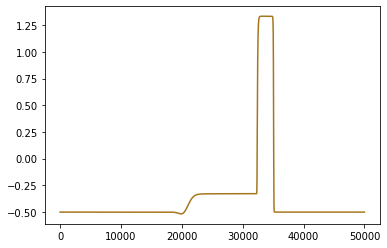

In [267]:
plt.plot(-prof[::-1,1])
#plt.ylim(-0.5,1)


In [168]:
data=pd.read_csv('f_out.dat', sep=' ', names=['t', 'frontpos', 'backpos', 'cometpos', 'frontdens'])

In [170]:
data

,t,frontpos,backpos,cometpos,frontdens
0,0.0,4957,5041,5048,10.941892
1,10.0,4803,4966,5001,4.803150
2,20.0,4682,4886,4963,3.522310
3,30.0,4568,4801,4944,3.056470
4,40.0,4455,4713,4972,2.848889
5,50.0,4343,4626,5009,2.748462
6,60.0,4232,4538,5050,2.698347
7,70.0,4121,4451,5093,2.673247
8,80.0,4010,4365,5137,2.660855
9,90.0,3898,4280,5183,2.654941


In [70]:
dx=1
beta=1.2
data=pd.read_csv('data_speeds/beta%.1f/dx%.1f/f_out.dat'%(beta, dx), sep=' ', names=['t', 'frontpos', 'backpos', 'cometpos', 'frontdens'])


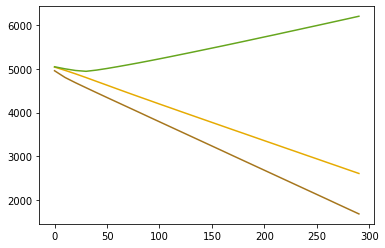

In [171]:
plt.plot(data.t, data.frontpos)
plt.plot(data.t, data.backpos)
plt.plot(data.t, data.cometpos)

In [209]:
list_dx=np.array([0.2, 0.5, 1.0])
list_beta=np.array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])

In [210]:
prof_m_tf={}
    
for beta in list_beta:
    prof_m_tf[beta]=np.loadtxt('data_speeds/beta%.1f/dx0.1/f_m_t249.dat'%(beta))[:,1]

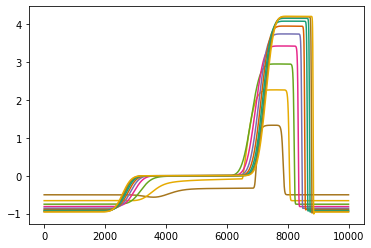

In [269]:
for beta in list_beta:
    plt.plot(-prof_m_tf[beta][::-1])

In [245]:
speedfront={}
speedback={}
speedcomet={}
frontdens={}

for dx in [0.1]:
    speedfront[dx]={}
    speedback[dx]={}
    speedcomet[dx]={}
    frontdens[dx]={}
    
    for beta in list_beta:
        try:
            data=pd.read_csv('data_speeds/beta%.1f/dx%.1f/f_out.dat'%(beta, dx), sep=' ', names=['t', 'frontpos', 'backpos', 'cometpos', 'frontdens'])
            speedfront[dx][beta]=np.polyfit(data.t[20:500], data.frontpos[20:500], deg=1)[0]
            speedback[dx][beta]=np.polyfit(data.t[20:500], data.backpos[20:500], deg=1)[0]
            speedcomet[dx][beta]=np.polyfit(data.t[20:500], data.cometpos[20:500], deg=1)[0]
            frontdens[dx][beta]=np.mean(data.frontdens.values[-50:])
        except: 
            pass

In [255]:
dx=0.1
beta=1.1
data=pd.read_csv('data_speeds/beta%.1f/dx%.1f/f_out.dat'%(beta, dx), sep=' ', names=['t', 'frontpos', 'backpos', 'cometpos', 'frontdens'])


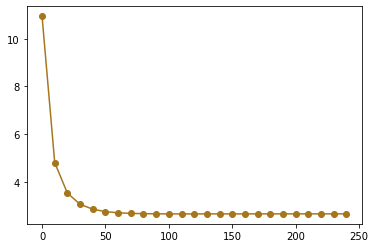

In [256]:
plt.plot(data.t, data.frontdens, 'o-')


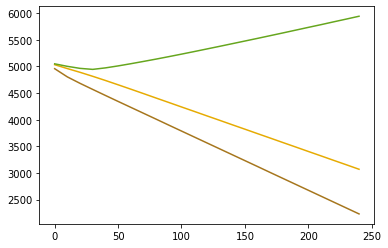

In [257]:
plt.plot(data.t, data.frontpos)
plt.plot(data.t, data.backpos)
plt.plot(data.t, data.cometpos)

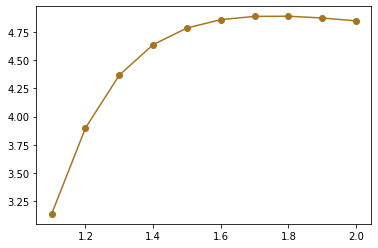

In [254]:
dx=.1
plt.plot(list(frontdens[dx]), [frontdens[dx][beta] for beta in frontdens[dx]], 'o-', label=r'$v_F$')


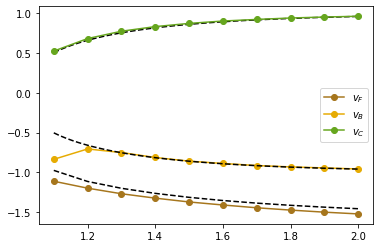

In [263]:
dx=0.1
plt.plot(list(speedfront[dx]), [speedfront[dx][beta]*dx for beta in speedfront[dx]], 'o-', label=r'$v_F$')
plt.plot(list(speedback[dx]), [speedback[dx][beta]*dx for beta in speedback[dx]], 'o-', label=r'$v_B$')

vec_beta=np.linspace(1.1,2.0)
fp_beta=np.array([fixed_point(lambda x: np.tanh(beta*x), 0.5) for beta in vec_beta])
plt.plot(vec_beta, fp_beta, 'k--')
plt.plot(vec_beta, -fp_beta, 'k--')

rho0=1
rhod=np.array([frontdens[dx][beta] for beta in frontdens[dx]])
fp_beta2=np.array([fixed_point(lambda x: np.tanh(beta*x), 0.5) for beta in list(frontdens[dx])])

plt.plot(list(frontdens[dx]), -fp_beta2*(rho0+rhod)/(rhod-rho0), 'k--')

plt.plot(list(speedcomet[dx]), [speedcomet[dx][beta]*dx for beta in speedcomet[dx]], 'o-', label=r'$v_C$')

plt.legend()

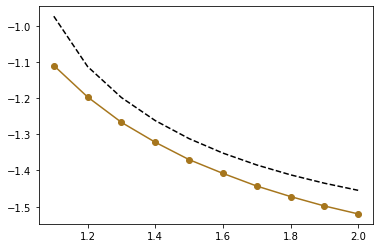

In [266]:
rho0=1.
rhod=np.array([frontdens[dx][beta] for beta in frontdens[dx]])
fp_beta2=np.array([fixed_point(lambda x: np.tanh(beta*x), 0.5) for beta in list(frontdens[dx])])

plt.plot(list(frontdens[dx]), -fp_beta2*(rho0+rhod)/(rhod-rho0), 'k--')

dx=0.1
plt.plot(list(speedfront[dx]), [speedfront[dx][beta]*dx for beta in speedfront[dx]], 'o-', label=r'$v_F$')


# $D_{\rho}=0$

In [211]:
list_t=np.arange(0,40000,5000)

In [255]:
beta=2.5
mat_rho={}
mat_m={}

for t in list_t:
    mat_m[t]=pd.read_csv('/users/invites/benvegnen/Thesis/AI1D/PDEs_1d/data_varying_beta_D0/beta%.1f/f_m_t%d.dat'%(beta, t), sep=' ', dtype=np.float64, names=['x', 'm'])


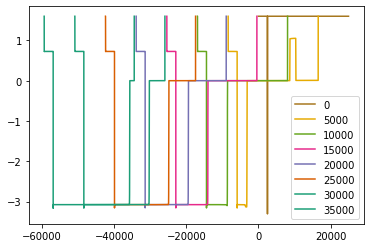

In [257]:
for t in list_t:
    plt.plot(mat_m[t].x, mat_m[t].m, label=t)
plt.legend()

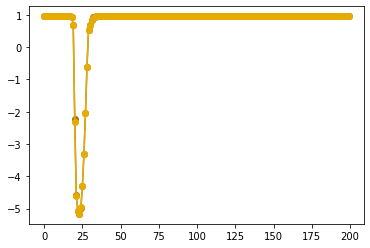

In [189]:
t=100
plt.plot(mat_m[t].m, 'o-')
plt.plot(mat_m[t+1].m, 'o-')


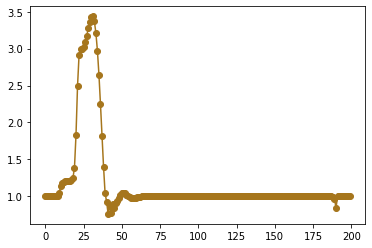

In [210]:
t=999
plt.plot(mat_rho[t].m, 'o-')


In [193]:
np.mean((mat_rho[t].m)<0)

0.005

In [54]:
mat_m={}
list_t=np.arange(5000,43000,5000)

for t in list_t:
    mat_m[t]=pd.read_csv('/users/invites/benvegnen/Thesis/AI1D/PDEs_1d/f_m_t%d.dat'%(t), sep=' ', dtype=np.float64, names=['x', 'm'])


FileNotFoundError: [Errno 2] File /users/invites/benvegnen/Thesis/AI1D/PDEs_1d/f_m_t40000.dat does not exist: '/users/invites/benvegnen/Thesis/AI1D/PDEs_1d/f_m_t40000.dat'

KeyError: 40000

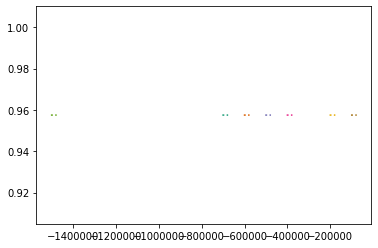

In [55]:
for t in list_t:
    plt.plot(mat_m[t].x, mat_m[t].m)

KeyError: 40000

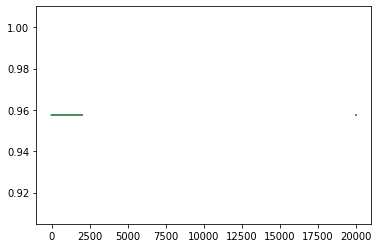

In [56]:
for t in list_t:
    plt.plot(mat_m[t].m)

# full sinh cosh

In [43]:
mat_m={}
list_t=np.arange(5000,43000,5000)
list_beta=np.array([1.1, 1.2, 1.4, 1.8, 2.5])

for beta in list_beta:
    mat_m[beta]={}
    for t in list_t:
        mat_m[beta][t]=pd.read_csv('/users/invites/benvegnen/Thesis/AI1D/PDEs_1d/data_varying_beta_D0/beta%s/f_m_t%d.dat'%(beta,t), sep=' ', dtype=np.float64, names=['x', 'm'])

    

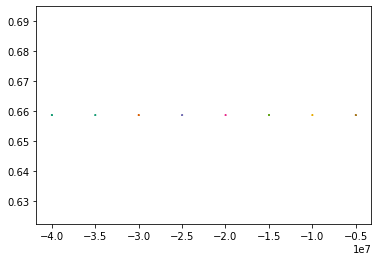

In [42]:
beta=1.2
for t in list_t:
    plt.plot(mat_m[beta][t].x, mat_m[beta][t].m)
    

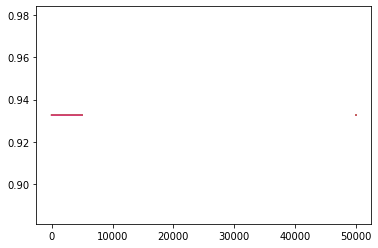

In [31]:
beta=1.8
for t in list_t[::2]:
    plt.plot(mat_m[beta][t].m)
    

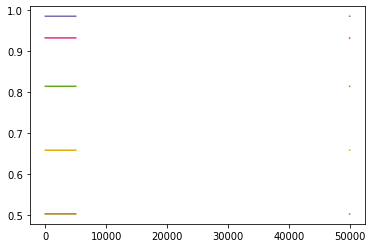

In [32]:
t=40000
for beta in list_beta:
    plt.plot(mat_m[beta][t].m)

# $r$-dependance

In [2]:
list_r=np.array([0, 0.2, 0.4, 0.6, 0.8, 1.])

In [134]:
rho={}
m={}
for r in list_r:
    rho[r]=pd.read_csv('data_varying_r/r%s/f_rho.dat'%str(r), sep=' ', index_col=False)
    m[r]=pd.read_csv('data_varying_r/r%s/f_m.dat'%str(r), sep=' ', index_col=False)

In [55]:
L=10000
dx=0.5

Text(0, 0.5, '$\\rho(x)$')

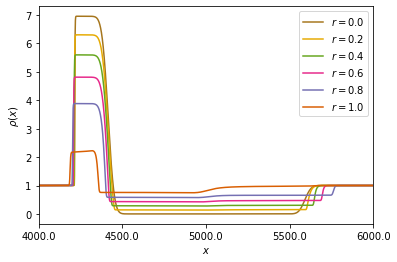

In [82]:
t=25
for r in list_r:
    plt.plot(rho[r].values[t,:], '-', label=r'$r=%.1f$'%r)
plt.legend()


xmin=4000
xmax=6000
plt.xlim(xmin/dx,xmax/dx)
plt.xticks(np.linspace(xmin/dx,xmax/dx,5), np.linspace(xmin, xmax, 5))

plt.xlabel(r'$x$')
plt.ylabel(r'$\rho(x)$')

Text(0, 0.5, '$m(x)$')

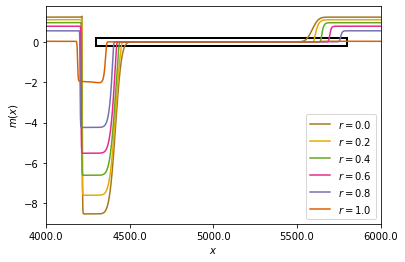

In [106]:
t=25
for r in list_r:
    plt.plot(m[r].values[t,:], '-', label=r'$r=%.1f$'%r)
plt.legend()

xmin=4000
xmax=6000
plt.xlim(xmin/dx,xmax/dx)
plt.xticks(np.linspace(xmin/dx,xmax/dx,5), np.linspace(xmin, xmax, 5))

rect = patches.Rectangle((4300/dx, -0.1/dx), 1500/dx, 0.2/dx, linewidth=2, edgecolor='k', facecolor='none')
plt.gca().add_patch(rect)

plt.xlabel(r'$x$')
plt.ylabel(r'$m(x)$')

Text(0, 0.5, '$m(x)$')

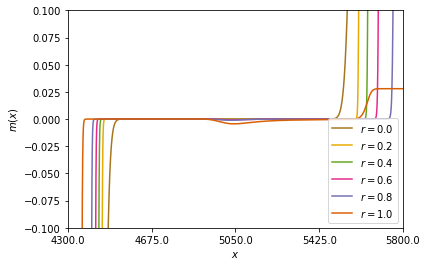

In [104]:
t=25
for r in list_r:
    plt.plot(m[r].values[t,:], '-', label=r'$r=%.1f$'%r)
plt.legend()

xmin=4300
xmax=5800


plt.xlim(xmin/dx,xmax/dx)
plt.xticks(np.linspace(xmin/dx,xmax/dx,5), np.linspace(xmin, xmax, 5))

plt.ylim(-0.1,0.1)

plt.xlabel(r'$x$')
plt.ylabel(r'$m(x)$')

Text(0.5, 0, '$x$')

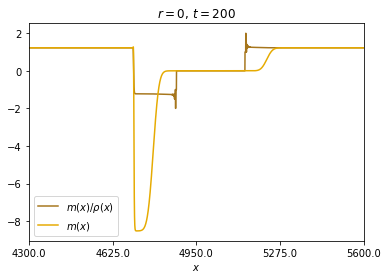

In [281]:
t=10
r=0
plt.plot(np.divide(m[r].values[t,:],rho[r].values[t,:], out=np.zeros_like(rho[r].values[t,:]), where=rho[r].values[t,:]!=0), '-', label=r'$m(x)/\rho(x)$', )

xmin=4300
xmax=5600

plt.plot(m[r].values[t,:], '-', label=r'$m(x)$')

plt.legend()

plt.title(r'$r=0,\,t=%d$'%(20*tils sont en effet))

plt.xlim(xmin/dx,xmax/dx)
plt.xticks(np.linspace(xmin/dx,xmax/dx,5), np.linspace(xmin, xmax, 5))

plt.xlabel(r'$x$')

In [183]:
def fitTanh(x, x0, k, phi):
    return(phi*np.tanh(k*(x-x0)))

In [190]:
y=np.divide(m[r].values[t,:],rho[r].values[t,:], out=np.zeros_like(rho[r].values[t,:]), where=rho[r].values[t,:]!=0)

xmin=9200
xmax=9600
y=y[xmin:xmax]
x=np.linspace(xmin*dx,xmax*dx,xmax-xmin)

In [191]:
x

array([4600.        , 4600.50125313, 4601.00250627, 4601.5037594 ,
       4602.00501253, 4602.50626566, 4603.0075188 , 4603.50877193,
       4604.01002506, 4604.5112782 , 4605.01253133, 4605.51378446,
       4606.01503759, 4606.51629073, 4607.01754386, 4607.51879699,
       4608.02005013, 4608.52130326, 4609.02255639, 4609.52380952,
       4610.02506266, 4610.52631579, 4611.02756892, 4611.52882206,
       4612.03007519, 4612.53132832, 4613.03258145, 4613.53383459,
       4614.03508772, 4614.53634085, 4615.03759398, 4615.53884712,
       4616.04010025, 4616.54135338, 4617.04260652, 4617.54385965,
       4618.04511278, 4618.54636591, 4619.04761905, 4619.54887218,
       4620.05012531, 4620.55137845, 4621.05263158, 4621.55388471,
       4622.05513784, 4622.55639098, 4623.05764411, 4623.55889724,
       4624.06015038, 4624.56140351, 4625.06265664, 4625.56390977,
       4626.06516291, 4626.56641604, 4627.06766917, 4627.56892231,
       4628.07017544, 4628.57142857, 4629.0726817 , 4629.57393

In [196]:
popt, pcov = curve_fit(fitTanh, x, y, p0=[4700, -2, 1.3])

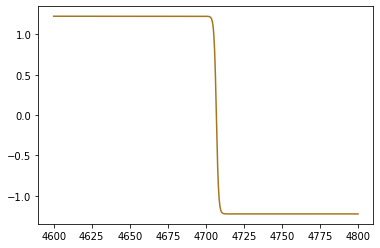

In [197]:
plt.plot(x, fitTanh(x, *popt))

In [213]:
tuple(popt)

(4706.903003577724, -0.6810191349334115, 1.225778144986466)

Text(0.5, 0, '$x$')

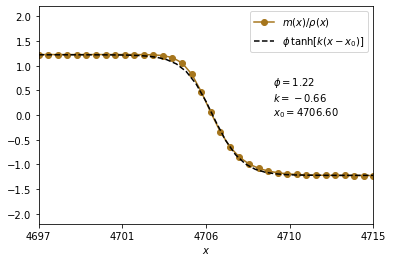

In [286]:
# Plot real data
t=10
r=0
plt.plot(np.divide(m[r].values[t,:],rho[r].values[t,:], out=np.zeros_like(rho[r].values[t,:]), where=rho[r].values[t,:]!=0), 'o-', label=r'$m(x)/\rho(x)$')

# Fit to tanh
y=np.divide(m[r].values[t,:],rho[r].values[t,:], out=np.zeros_like(rho[r].values[t,:]), where=rho[r].values[t,:]!=0)

xmin=9395
xmax=9430
y=y[xmin:xmax]
x=np.linspace(xmin*dx,xmax*dx,xmax-xmin)

popt, pcov = curve_fit(fitTanh, x, y, p0=[4700, -2, 1.3])
#plt.plot(x/dx, fitTanh(x, *popt), 'k--', label=r'$\phi\,\tanh{[k(x-x_0)]}$')
phi=1.22
k=-0.66
x0=4706.6
plt.plot(x/dx, fitTanh(x, x0, k, phi), 'k--', label=r'$\phi\,\tanh{[k(x-x_0)]}$')
plt.legend()

# Plot parameters
#plt.text(x=0.7, y = 0.5, s=r'$\phi = %.2f$'%popt[2]+'\n'+'$k = %.2f$'%popt[1]+'\n'+'$x_0 = %.2f$'%popt[0], transform=plt.gca().transAxes)
plt.text(x=0.7, y = 0.5, s=r'$\phi = %.2f$'%phi+'\n'+'$k = %.2f$'%k+'\n'+'$x_0 = %.2f$'%x0, transform=plt.gca().transAxes)

# Final rendering
xmin=xmin*dx
xmax=xmax*dx


plt.xlim(xmin/dx,xmax/dx)
plt.xticks(np.linspace(xmin/dx,xmax/dx,5), np.int64(np.linspace(xmin, xmax, 5)))

plt.xlabel(r'$x$')


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Text(0, 0.5, '$m(x)$')

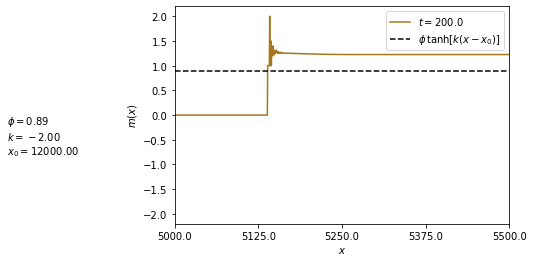

In [242]:
# Plot real data
t=10
r=0
plt.plot(np.divide(m[r].values[t,:],rho[r].values[t,:], out=np.zeros_like(rho[r].values[t,:]), where=rho[r].values[t,:]!=0), '-', label=r'$t=%.1f$'%(20*t))

# Fit to tanh
y=np.divide(m[r].values[t,:],rho[r].values[t,:], out=np.zeros_like(rho[r].values[t,:]), where=rho[r].values[t,:]!=0)

xmin=10000
xmax=11000
y=y[xmin:xmax]
x=np.linspace(xmin*dx,xmax*dx,xmax-xmin)
popt, pcov = curve_fit(fitTanh, x, y, p0=[12000, -2, 1.3])

plt.plot(x/dx, fitTanh(x, *popt), 'k--', label=r'$\phi\,\tanh{[k(x-x_0)]}$')
plt.legend()

# Plot parameters
plt.text(x=2*4750, y = -0.8, s=r'$\phi = %.2f$'%popt[2]+'\n'+'$k = %.2f$'%popt[1]+'\n'+'$x_0 = %.2f$'%popt[0])

# Final rendering
xmin=xmin*dx
xmax=xmax*dx

plt.xlim(xmin/dx,xmax/dx)
plt.xticks(np.linspace(xmin/dx,xmax/dx,5), np.linspace(xmin, xmax, 5))

plt.xlabel(r'$x$')
plt.ylabel(r'$m(x)$')

Text(0, 0.5, '$\\rho(x)$')

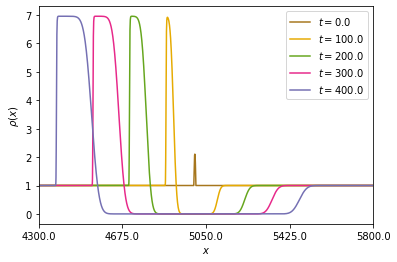

In [123]:
r=0.
for t in range(0, 25,5):
    plt.plot(rho[r].values[t,:], '-', label=r'$t=%.1f$'%(20*t))
plt.legend()

xmin=4300
xmax=5800


plt.xlim(xmin/dx,xmax/dx)
plt.xticks(np.linspace(xmin/dx,xmax/dx,5), np.linspace(xmin, xmax, 5))

# plt.ylim(-0.1,0.1)

plt.xlabel(r'$x$')
plt.ylabel(r'$\rho(x)$')

In [125]:
list_rho=np.array([20, 5, 2.5, 1.666, 1.25])

In [130]:
rho_2={}
m_2={}
for rho0 in list_rho:
    rho_2[rho0]=pd.read_csv('data_fixed_r_over_rho/rhol%s/f_rho.dat'%str(rho), sep=' ', index_col=False)
    m_2[rho0]=pd.read_csv('data_fixed_r_over_rho/rhol%s/f_m.dat'%str(rho), sep=' ', index_col=False)

In [133]:
list(rho)

TypeError: 'numpy.float64' object is not iterable

Text(0, 0.5, '$\\rho(x)$')

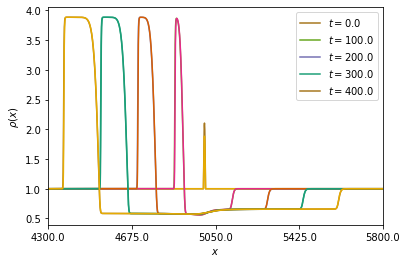

In [160]:
r=0.8
rho0=1.25
for t in range(0, 25,5):
    plt.plot(rho[r].values[t,:], '-', label=r'$t=%.1f$'%(20*t))
    plt.plot(rho_2[rho0].values[t,:]/rho0, '-')

plt.legend()

xmin=4300
xmax=5800


plt.xlim(xmin/dx,xmax/dx)
plt.xticks(np.linspace(xmin/dx,xmax/dx,5), np.linspace(xmin, xmax, 5))

# plt.ylim(-0.1,0.1)

plt.xlabel(r'$x$')
plt.ylabel(r'$\rho(x)$')

(20000, 20020)

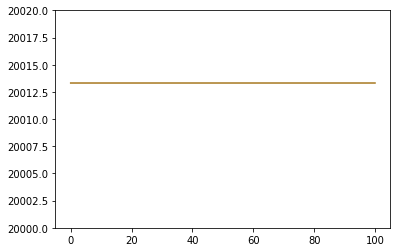

In [155]:
plt.plot(np.sum(rho[r].values, axis=1))
plt.ylim(20000,20020)

In [157]:
np.sum(rho[r].values, axis=1)-20000

array([13.31768 , 13.317681, 13.317673, 13.317681, 13.317697, 13.317669,
       13.317689, 13.317678, 13.317682, 13.317686, 13.317679, 13.31769 ,
       13.317685, 13.317676, 13.317664, 13.317678, 13.317672, 13.317697,
       13.317683, 13.317672, 13.317655, 13.317677, 13.317699, 13.317678,
       13.317694, 13.317728, 13.31768 , 13.317692, 13.317716, 13.31773 ,
       13.317742, 13.317675, 13.317739, 13.31771 , 13.317736, 13.317726,
       13.317714, 13.317721, 13.317727, 13.317716, 13.317768, 13.317732,
       13.317727, 13.317708, 13.317728, 13.317748, 13.317735, 13.317735,
       13.317734, 13.31774 , 13.317768, 13.31772 , 13.317778, 13.317801,
       13.317776, 13.317763, 13.317793, 13.317746, 13.317764, 13.31782 ,
       13.317783, 13.317804, 13.3178  , 13.317793, 13.317809, 13.317818,
       13.317789, 13.317784, 13.317789, 13.317795, 13.317793, 13.317798,
       13.317817, 13.31781 , 13.31782 , 13.317798, 13.317807, 13.317816,
       13.317833, 13.317855, 13.317851, 13.317802, 